<a href="https://colab.research.google.com/github/siu1997/LGMVIP-DataScience/blob/main/Prediction%20Using%20Decision%20Tree%20algorithm/LGMVIP_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LGMVIP Task 1
September 2021
##Prediction Using Decision Tree Algorithm
In this Task, we have to create a Decision Tree Classifier and visualize it graphically.
The purpose of creating this model is that if we feed any new data to this classifier, it would be able to predict the right class accordingly

##Author: Shreyans Upadhyay

##Step1: Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

##Step 2: Load the dataset

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
loc="drive/My Drive/Dataset"

In [6]:
df=pd.read_csv(loc+ "/Iris.csv")

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##Step 3: Extracting the Information about data

In [43]:
df.shape, df.dtypes, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


((150, 6), Id                 int64
 SepalLengthCm    float64
 SepalWidthCm     float64
 PetalLengthCm    float64
 PetalWidthCm     float64
 Species           object
 dtype: object, None)

In [44]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


##Step 4: Splitting the dataset into train and test set

In [12]:
feature_cols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x=df[feature_cols]
y=df.Species

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

##Step 5: Model Building

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf=clf.fit(x_train, y_train)

In [19]:
y_pred = clf.predict(x_test)

In [20]:
#evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

Accuracy: 0.9736842105263158


From the above report we can observe that, the accuracy score of our model is 97.6384% 

##Step 6: Visualize the Result

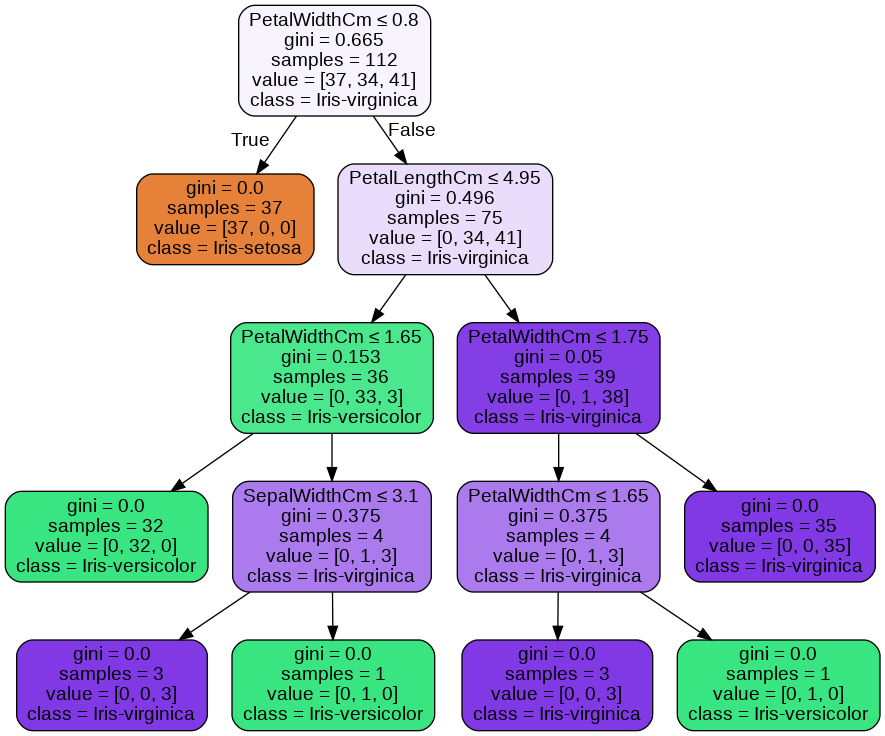

In [40]:
feature_cols =[ 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'] # Tree Representation 
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Iris.png')
Image(graph.create_png())